In [1]:
import pandas as pd
#import glob #to find pathnames

csv_path = "D:\DreamElevenScouting\Datasets\gk-stats.csv"

#These features repeats in every CSV
redundant = ['Rk','Player','Nation','Pos','Squad','Comp','Age','Born','90s','Matches']

#reading the csv and removing reduntant features to improve the model accuracy
#path =r'D:\DreamElevenScouting\Datasets\player-stats.csv'
general = pd.read_csv(csv_path, header=1).drop(['Rk','Matches'], axis=1)
shooting = pd.read_csv(csv_path, header=1).drop(redundant,axis=1)
passing = pd.read_csv(csv_path,header=1).drop(redundant,axis=1)
passing_types = pd.read_csv(csv_path, header=1).drop(redundant,axis=1)
gca = pd.read_csv(csv_path, header=1).drop(redundant, axis=1)
defense = pd.read_csv(csv_path, header=1).drop(redundant,axis=1)
possesion = pd.read_csv(csv_path, header=1).drop(redundant,axis=1)
misc = pd.read_csv(csv_path, header=1).drop(redundant ,axis=1)

In [2]:
#appending table no before column names to avoid duplicates
def renameColumns(table_no, df):
    num = str(table_no) + "_"
    return df.rename(columns=lambda x:num+x)

shooting = renameColumns(2,shooting)
passing = renameColumns(3,passing)
passing_types = renameColumns(4, passing_types)
gca = renameColumns(5,gca)
defense=renameColumns(6,defense)
possesion=renameColumns(7,possesion)
misc=renameColumns(8,misc)

#combining the above dataframes into single df
grand =pd.concat([general,shooting,passing,passing_types,gca,defense,possesion,misc], axis=1)

In [3]:
grand.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,8_D,8_L,8_CS,8_CS%,8_PKatt,8_PKA,8_PKsv,8_PKm,8_Save%.1,8_-9999
0,Adrián,es ESP,GK,Liverpool,eng Premier League,33,1987,3,3,270,...,1.0,1,1.0,33.3,0.0,0.0,0.0,0.0,NaN,f76e6b4e
1,Rúnar Alex Rúnarsson,is ISL,GK,Arsenal,eng Premier League,25,1995,1,0,16,...,0.0,0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,8fa8f8d2
2,Alisson,br BRA,GK,Liverpool,eng Premier League,27,1992,33,33,2970,...,8.0,7,10.0,30.3,8.0,4.0,1.0,3.0,20.0,7a2e46a8
3,Saturnin Allagbé,bj BEN,GK,Dijon,fr Ligue 1,26,1993,12,12,1080,...,2.0,8,3.0,25.0,3.0,1.0,1.0,1.0,50.0,b052b8bf
4,Nícolas Andrade,br BRA,GK,Udinese,it Serie A,32,1988,2,2,180,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,NaN,326d09ef


In [4]:
# atleast 3 90s played
df = grand[grand['90s']>=3]

# extracting player names
df['Player'] = df['Player'].str.split('\\', expand=True)[0]

# removing country short forms
df['Comp'] = df['Comp'].str.split(' ', expand=True, n=1)[1]

C:\Users\yusry\AppData\Local\Temp\ipykernel_13696\1753036074.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Player'] = df['Player'].str.split('\\', expand=True)[0]
C:\Users\yusry\AppData\Local\Temp\ipykernel_13696\1753036074.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comp'] = df['Comp'].str.split(' ', expand=True, n=1)[1]


In [5]:
df

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,8_D,8_L,8_CS,8_CS%,8_PKatt,8_PKA,8_PKsv,8_PKm,8_Save%.1,8_-9999
0,Adrián,es ESP,GK,Liverpool,Premier League,33,1987,3,3,270,...,1.0,1,1.0,33.3,0.0,0.0,0.0,0.0,NaN,f76e6b4e
2,Alisson,br BRA,GK,Liverpool,Premier League,27,1992,33,33,2970,...,8.0,7,10.0,30.3,8.0,4.0,1.0,3.0,20.0,7a2e46a8
3,Saturnin Allagbé,bj BEN,GK,Dijon,Ligue 1,26,1993,12,12,1080,...,2.0,8,3.0,25.0,3.0,1.0,1.0,1.0,50.0,b052b8bf
6,Alphonse Areola,fr FRA,GK,Fulham,Premier League,27,1993,36,36,3240,...,13.0,18,9.0,25.0,6.0,6.0,0.0,0.0,0.0,2f965a72
7,Kepa Arrizabalaga,es ESP,GK,Chelsea,Premier League,25,1994,7,6,585,...,2.0,2,2.0,33.3,1.0,1.0,0.0,0.0,0.0,28d596a0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Iván Villar,es ESP,GK,Celta Vigo,La Liga,23,1997,21,19,1781,...,5.0,7,5.0,26.3,7.0,6.0,1.0,0.0,14.3,cde52ef5
203,Rubén Yáñez,es ESP,GK,Getafe,La Liga,26,1993,10,10,900,...,3.0,4,4.0,40.0,1.0,1.0,0.0,0.0,0.0,039ae103
204,Yoel,es ESP,GK,Eibar,La Liga,31,1988,4,3,300,...,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,NaN,61bb7498
205,Robin Zentner,de GER,GK,Mainz 05,Bundesliga,25,1994,31,31,2790,...,9.0,13,5.0,16.1,6.0,5.0,0.0,1.0,0.0,5c4bf6ba


In [6]:
df.isnull().sum()

Player        0
Nation        0
Pos           0
Squad         0
Comp          0
             ..
8_PKA         0
8_PKsv        0
8_PKm         0
8_Save%.1    19
8_-9999       0
Length: 160, dtype: int64

In [7]:
df = df.fillna(0)

In [8]:
#checking for duplicated player names
df['Player'].duplicated().sum()

2

In [9]:
df[df['Player']=='Manuel Neuer']

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,8_D,8_L,8_CS,8_CS%,8_PKatt,8_PKA,8_PKsv,8_PKm,8_Save%.1,8_-9999
127,Manuel Neuer,de GER,GK,Bayern Munich,Bundesliga,34,1986,33,33,2970,...,5.0,4,9.0,27.3,3.0,1.0,1.0,1.0,50.0,8778c910


In [10]:
df[df['Player']=='Keylor Navas']

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,8_D,8_L,8_CS,8_CS%,8_PKatt,8_PKA,8_PKsv,8_PKm,8_Save%.1,8_-9999
125,Keylor Navas,cr CRC,GK,Paris S-G,Ligue 1,33,1986,29,29,2520,...,3.0,5,14.0,48.3,2.0,1.0,1.0,0.0,50.0,ecada4fc


In [11]:
pd.set_option('display.max_columns', None)

# view DataFrame
print(df)

                Player  Nation Pos       Squad            Comp  Age  Born  MP   
0               Adrián  es ESP  GK   Liverpool  Premier League   33  1987   3  \
2              Alisson  br BRA  GK   Liverpool  Premier League   27  1992  33   
3     Saturnin Allagbé  bj BEN  GK       Dijon         Ligue 1   26  1993  12   
6      Alphonse Areola  fr FRA  GK      Fulham  Premier League   27  1993  36   
7    Kepa Arrizabalaga  es ESP  GK     Chelsea  Premier League   25  1994   7   
..                 ...     ...  ..         ...             ...  ...   ...  ..   
201        Iván Villar  es ESP  GK  Celta Vigo         La Liga   23  1997  21   
203        Rubén Yáñez  es ESP  GK      Getafe         La Liga   26  1993  10   
204               Yoel  es ESP  GK       Eibar         La Liga   31  1988   4   
205      Robin Zentner  de GER  GK    Mainz 05      Bundesliga   25  1994  31   
207        Jeroen Zoet  nl NED  GK      Spezia         Serie A   29  1991   7   

     Starts   Min   90s    

In [12]:
import numpy as np #imported to work with arrays


players = []
for idx in range(len(df)):
    players.append(df['Player'][idx] + '({})'.format(df['Squad'][idx]))

df.reset_index(inplace=True)
player_ID = dict(zip(players, np.arange(len(players))))
player_ID

KeyError: 1

In [ ]:
df

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm,Save%.1,-9999,2_MP,2_Starts,2_Min,2_GA,2_GA90,2_SoTA,2_Saves,2_Save%,2_W,2_D,2_L,2_CS,2_CS%,2_PKatt,2_PKA,2_PKsv,2_PKm,2_Save%.1,2_-9999,3_MP,3_Starts,3_Min,3_GA,3_GA90,3_SoTA,3_Saves,3_Save%,3_W,3_D,3_L,3_CS,3_CS%,3_PKatt,3_PKA,3_PKsv,3_PKm,3_Save%.1,3_-9999,4_MP,4_Starts,4_Min,4_GA,4_GA90,4_SoTA,4_Saves,4_Save%,4_W,4_D,4_L,4_CS,4_CS%,4_PKatt,4_PKA,4_PKsv,4_PKm,4_Save%.1,4_-9999,5_MP,5_Starts,5_Min,5_GA,5_GA90,5_SoTA,5_Saves,5_Save%,5_W,5_D,5_L,5_CS,5_CS%,5_PKatt,5_PKA,5_PKsv,5_PKm,5_Save%.1,5_-9999,6_MP,6_Starts,6_Min,6_GA,6_GA90,6_SoTA,6_Saves,6_Save%,6_W,6_D,6_L,6_CS,6_CS%,6_PKatt,6_PKA,6_PKsv,6_PKm,6_Save%.1,6_-9999,7_MP,7_Starts,7_Min,7_GA,7_GA90,7_SoTA,7_Saves,7_Save%,7_W,7_D,7_L,7_CS,7_CS%,7_PKatt,7_PKA,7_PKsv,7_PKm,7_Save%.1,7_-9999,8_MP,8_Starts,8_Min,8_GA,8_GA90,8_SoTA,8_Saves,8_Save%,8_W,8_D,8_L,8_CS,8_CS%,8_PKatt,8_PKA,8_PKsv,8_PKm,8_Save%.1,8_-9999
0,Adrián,es ESP,GK,Liverpool,Premier League,33,1987,3,3,270,3.0,9.0,3.00,18,9,50.0,1.0,1.0,1,1.0,33.3,0.0,0.0,0.0,0.0,0.0,f76e6b4e,3,3,270,9.0,3.00,18,9,50.0,1.0,1.0,1,1.0,33.3,0.0,0.0,0.0,0.0,0.0,f76e6b4e,3,3,270,9.0,3.00,18,9,50.0,1.0,1.0,1,1.0,33.3,0.0,0.0,0.0,0.0,0.0,f76e6b4e,3,3,270,9.0,3.00,18,9,50.0,1.0,1.0,1,1.0,33.3,0.0,0.0,0.0,0.0,0.0,f76e6b4e,3,3,270,9.0,3.00,18,9,50.0,1.0,1.0,1,1.0,33.3,0.0,0.0,0.0,0.0,0.0,f76e6b4e,3,3,270,9.0,3.00,18,9,50.0,1.0,1.0,1,1.0,33.3,0.0,0.0,0.0,0.0,0.0,f76e6b4e,3,3,270,9.0,3.00,18,9,50.0,1.0,1.0,1,1.0,33.3,0.0,0.0,0.0,0.0,0.0,f76e6b4e,3,3,270,9.0,3.00,18,9,50.0,1.0,1.0,1,1.0,33.3,0.0,0.0,0.0,0.0,0.0,f76e6b4e
2,Alisson,br BRA,GK,Liverpool,Premier League,27,1992,33,33,2970,33.0,32.0,0.97,115,82,75.7,18.0,8.0,7,10.0,30.3,8.0,4.0,1.0,3.0,20.0,7a2e46a8,33,33,2970,32.0,0.97,115,82,75.7,18.0,8.0,7,10.0,30.3,8.0,4.0,1.0,3.0,20.0,7a2e46a8,33,33,2970,32.0,0.97,115,82,75.7,18.0,8.0,7,10.0,30.3,8.0,4.0,1.0,3.0,20.0,7a2e46a8,33,33,2970,32.0,0.97,115,82,75.7,18.0,8.0,7,10.0,30.3,8.0,4.0,1.0,3.0,20.0,7a2e46a8,33,33,2970,32.0,0.97,115,82,75.7,18.0,8.0,7,10.0,30.3,8.0,4.0,1.0,3.0,20.0,7a2e46a8,33,33,2970,32.0,0.97,115,82,75.7,18.0,8.0,7,10.0,30.3,8.0,4.0,1.0,3.0,20.0,7a2e46a8,33,33,2970,32.0,0.97,115,82,75.7,18.0,8.0,7,10.0,30.3,8.0,4.0,1.0,3.0,20.0,7a2e46a8,33,33,2970,32.0,0.97,115,82,75.7,18.0,8.0,7,10.0,30.3,8.0,4.0,1.0,3.0,20.0,7a2e46a8
3,Saturnin Allagbé,bj BEN,GK,Dijon,Ligue 1,26,1993,12,12,1080,12.0,30.0,2.50,66,36,56.1,2.0,2.0,8,3.0,25.0,3.0,1.0,1.0,1.0,50.0,b052b8bf,12,12,1080,30.0,2.50,66,36,56.1,2.0,2.0,8,3.0,25.0,3.0,1.0,1.0,1.0,50.0,b052b8bf,12,12,1080,30.0,2.50,66,36,56.1,2.0,2.0,8,3.0,25.0,3.0,1.0,1.0,1.0,50.0,b052b8bf,12,12,1080,30.0,2.50,66,36,56.1,2.0,2.0,8,3.0,25.0,3.0,1.0,1.0,1.0,50.0,b052b8bf,12,12,1080,30.0,2.50,66,36,56.1,2.0,2.0,8,3.0,25.0,3.0,1.0,1.0,1.0,50.0,b052b8bf,12,12,1080,30.0,2.50,66,36,56.1,2.0,2.0,8,3.0,25.0,3.0,1.0,1.0,1.0,50.0,b052b8bf,12,12,1080,30.0,2.50,66,36,56.1,2.0,2.0,8,3.0,25.0,3.0,1.0,1.0,1.0,50.0,b052b8bf,12,12,1080,30.0,2.50,66,36,56.1,2.0,2.0,8,3.0,25.0,3.0,1.0,1.0,1.0,50.0,b052b8bf
6,Alphonse Areola,fr FRA,GK,Fulham,Premier League,27,1993,36,36,3240,36.0,48.0,1.33,161,114,73.9,5.0,13.0,18,9.0,25.0,6.0,6.0,0.0,0.0,0.0,2f965a72,36,36,3240,48.0,1.33,161,114,73.9,5.0,13.0,18,9.0,25.0,6.0,6.0,0.0,0.0,0.0,2f965a72,36,36,3240,48.0,1.33,161,114,73.9,5.0,13.0,18,9.0,25.0,6.0,6.0,0.0,0.0,0.0,2f965a72,36,36,3240,48.0,1.33,161,114,73.9,5.0,13.0,18,9.0,25.0,6.0,6.0,0.0,0.0,0.0,2f965a72,36,36,3240,48.0,1.33,161,114,73.9,5.0,13.0,18,9.0,25.0,6.0,6.0,0.0,0.0,0.0,2f965a72,36,36,3240,48.0,1.33,161,114,73.9,5.0,13.0,18,9.0,25.0,6.0,6.0,0.0,0.0,0.0,2f965a72,36,36,3240,48.0,1.33,161,114,73.9,5.0,13.0,18,9.0,25.0,6.0,6.0,0.0,0.0,0.0,2f965a72,36,36,3240,48.0,1.33,161,114,73.9,5.0,13.0,18,9.0,25.0,6.0,6.0,0.0,0.0,0.0,2f965a72
7,Kepa Arrizabalaga,es ESP,GK,Chelsea,Premier League,25,1994,7,6,585,6.5,8.0,1.23,23,15,69.6,2.0,2.0,2,2.0,33.3,1.0,1.0,0.0,0.0,0.0,28d596a0,7,6,585,8.0,1.23,23,15,69.6,2.0,2.0,2,2.0,33.

In [ ]:


foot = []

if '4_Left' in df.columns and '4_Right' in df.columns:
    for i in range(len(df)):
        # ratio of left to right foot passes
        if df['4_Right'][i] != 0:
            val = df['4_Left'][i]/(df['4_Right'][i])
            if val>1:
                foot.append('left')
            else:
                foot.append('right')
        else:
            foot.append('none')

    # adding to the data frame        
    df['Foot'] = foot
else:
    print("One or both of the required columns are missing in the DataFrame.")


One or both of the required columns are missing in the DataFrame.


Text(0.5, 1.0, 'Position distribution among Leagues')

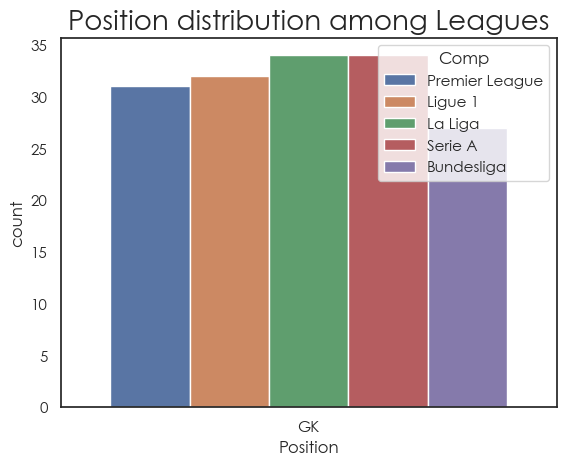

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


sns.set_theme(style="white", font="Century Gothic")

ax = sns.countplot(x="Pos" , hue='Comp' , data=df)
plt.xlabel('Position')
plt.title('Position distribution among Leagues', size=20)

C:\Users\yusry\AppData\Local\Temp\ipykernel_10568\250655146.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


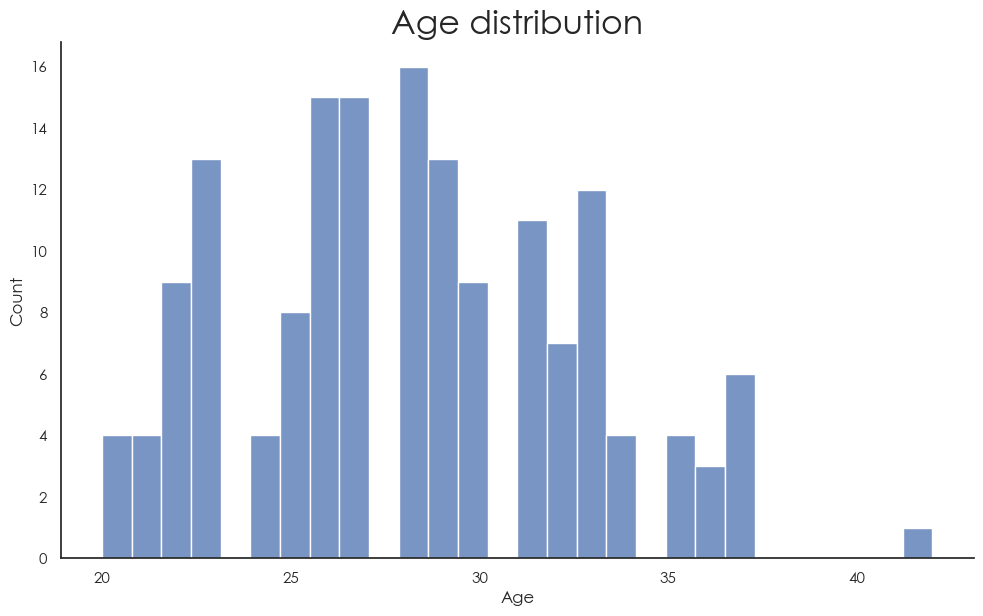

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


sns.FacetGrid(df, height=6, aspect=10/6) \
   .map(sns.histplot, "Age", bins=28)
plt.title("Age distribution", size=24)

plt.show()

Text(0.5, 1.0, 'Age variance in Leagues')

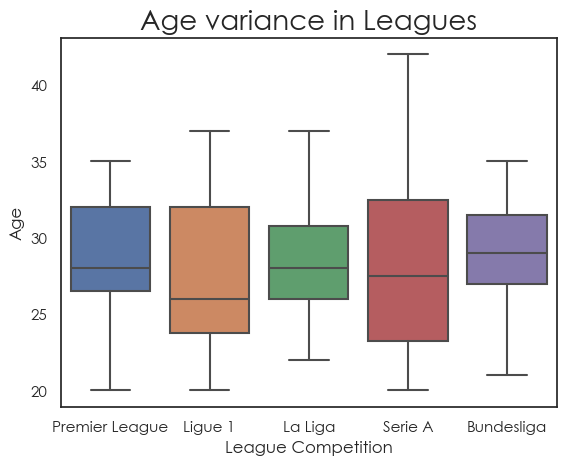

In [ ]:
ax = sns.boxplot(x='Comp' , y='Age' , data=df)
plt.xlabel('League Competition')
plt.title('Age variance in Leagues', size=20)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# selecting only numerical metrics
stats = df.select_dtypes(include=np.number)
# position types
labels = df['Pos']

# standardizing the data
data = StandardScaler().fit_transform(stats)

# configuring tSNE params
model = TSNE(n_components=2, perplexity=30, random_state=0)
tsne_data = model.fit_transform(data)

# creating a new df to plot the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension 1", "Dimension 2", "Positions"))

# ploting the result of tSNE
ax = sns.FacetGrid(tsne_df, hue="Positions", height=7)\
        .map(plt.scatter, 'Dimension 1', 'Dimension 2').add_legend()
plt.title('t-SNE - Outfield players', size=20)

ValueError: Input X contains NaN.
TSNE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
print(stats.isna().sum())

Age           0
Born          0
MP            0
Starts        0
Min           0
             ..
8_PKatt       0
8_PKA         0
8_PKsv        0
8_PKm         0
8_Save%.1    19
Length: 147, dtype: int64


In [ ]:
stats = stats.dropna()


In [ ]:
print(stats.isna().sum())


Age           0
Born          0
MP            0
Starts        0
Min           0
             ..
8_PKatt       0
8_PKA         0
8_PKsv        0
8_PKm         0
8_Save%.1    19
Length: 147, dtype: int64


Text(0.5, 1.0, 't-SNE - GoalKeepers')

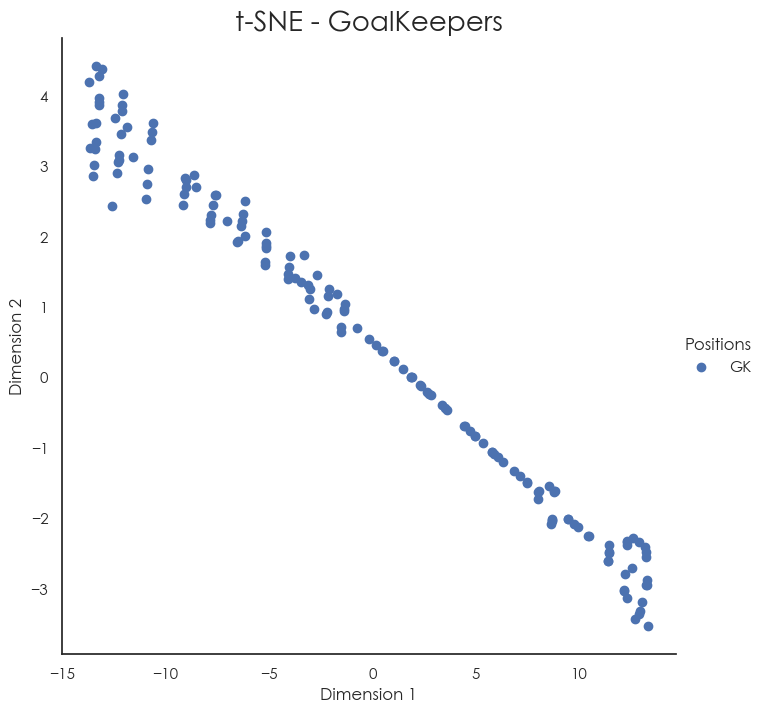

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer

# selecting only numerical metrics
stats = df.select_dtypes(include=np.number)
# position types
labels = df['Pos']

# standardizing the data
imputer = SimpleImputer(strategy='mean')
data = imputer.fit_transform(stats)
#data = StandardScaler().fit_transform(stats)

# configuring tSNE params
model = TSNE(n_components=2, perplexity=30, random_state=0)
tsne_data = model.fit_transform(data)

# creating a new df to plot the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension 1", "Dimension 2", "Positions"))

# ploting the result of tSNE
ax = sns.FacetGrid(tsne_df, hue="Positions", height=7)\
        .map(plt.scatter, 'Dimension 1', 'Dimension 2').add_legend()
plt.title('t-SNE - GoalKeepers', size=20)

Text(0.5, 1.0, 'PCA: components selection')

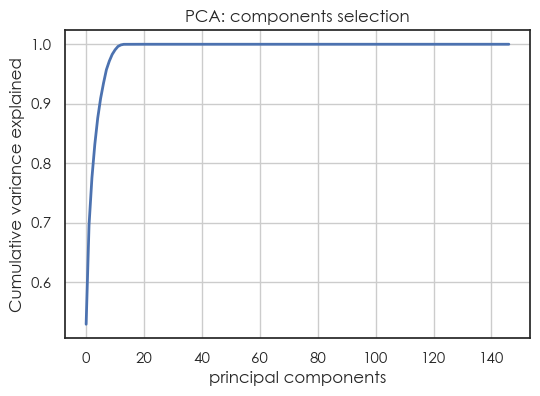

In [ ]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# standardizing the data
data = StandardScaler().fit_transform(stats)
# create an instance of the SimpleImputer class
imputer = SimpleImputer(strategy='mean')
# fill missing values with mean
data = imputer.fit_transform(data)

# setting up and running PCA
pca = decomposition.PCA()
pca.n_components = 147
pca_data = pca.fit_transform(data)

# % variance explained per components
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

# cumulative variance explained
cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(1, figsize=(6, 4))
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('principal components')
plt.ylabel('Cumulative variance explained')
plt.title('PCA: components selection')